# Problem Statement:

- Predict if the person has diabetes or not based on the given features.

## Data context

- State: Geographical location, possibly indicating regional differences in health outcomes.

- Age_Group: Age categorization, which can help in understanding age-related risks.

- Gender: Biological sex, which can influence health outcomes due to physiological differences.

- BMI: Body Mass Index, a measure of body fat based on height and weight.

- Smoking_Status: Indicates whether the individual is a smoker, which is a significant risk factor for many health issues.

- Alcohol_Consumption: Level of alcohol intake, another lifestyle factor affecting health.

- Exercise_Frequency: How often the individual exercises, impacting cardiovascular health.

- Hypertension: Presence of high blood pressure, a risk factor for heart disease.

- Diabetes: Presence of diabetes, which can increase the risk of heart attacks.

- Cholesterol_Level: Levels of cholesterol in the blood, affecting heart health.

- Family_History: Family history of heart disease, indicating genetic predisposition.

- Stress_Level: Level of stress, which can impact both mental and physical health.

- Diet_Type: Type of diet followed, influencing overall health and risk factors.

- Heart_Attack_Severity: Severity of any heart attacks experienced.

- Hospitalized: Whether the individual was hospitalized, indicating the severity of health issues.

- Survived: Outcome of the health event, particularly survival after a heart attack.

- Income_Level: Socioeconomic status, which can influence access to healthcare and lifestyle choices.

- Urban_Rural: Whether the individual lives in an urban or rural area, affecting access to healthcare and lifestyle.

- Employment_Status: Employment status, which can impact stress levels and access to healthcare.




In [55]:
# Importing all the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [56]:
df = pd.read_csv('nigeria_diabetes.csv')
df.head()

,State,Age_Group,Gender,BMI,Smoking_Status,Alcohol_Consumption,Exercise_Frequency,Hypertension,Diabetes,Cholesterol_Level,Family_History,Stress_Level,Diet_Type,Heart_Attack_Severity,Hospitalized,Survived,Income_Level,Urban_Rural,Employment_Status
0,Ondo,Youth,Female,34.5,Non-Smoker,High,Occasionally,No,Yes,Borderline,Yes,Low,Unhealthy,Mild,No,Yes,Medium,Urban,Employed
1,FCT,Youth,Male,15.2,Non-Smoker,High,Occasionally,No,Yes,High,No,Moderate,Unhealthy,Mild,Yes,No,High,Rural,Employed
2,Borno,Youth,Female,25.0,Non-Smoker,High,Weekly,No,Yes,High,No,Moderate,Mixed,Moderate,Yes,No,Medium,Rural,Student
3,Katsina,Youth,Male,19.7,Non-Smoker,High,Occasionally,No,No,High,Yes,High,Healthy,Mild,Yes,No,Low,Rural,Unemployed
4,Kaduna,Adult,Female,35.6,Non-Smoker,Low,Rarely,No,Yes,High,Yes,High,Healthy,Moderate,No,Yes,Low,Rural,Student


In [57]:
print(df.columns.to_list())

['State', 'Age_Group', 'Gender', 'BMI', 'Smoking_Status', 'Alcohol_Consumption', 'Exercise_Frequency', 'Hypertension', 'Diabetes', 'Cholesterol_Level', 'Family_History', 'Stress_Level', 'Diet_Type', 'Heart_Attack_Severity', 'Hospitalized', 'Survived', 'Income_Level', 'Urban_Rural', 'Employment_Status']


In [58]:
print(df.shape)

(898796, 19)


In [59]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898796 entries, 0 to 898795
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   State                  898796 non-null  object 
 1   Age_Group              898796 non-null  object 
 2   Gender                 898796 non-null  object 
 3   BMI                    898796 non-null  float64
 4   Smoking_Status         898796 non-null  object 
 5   Alcohol_Consumption    673208 non-null  object 
 6   Exercise_Frequency     898796 non-null  object 
 7   Hypertension           898796 non-null  object 
 8   Diabetes               898796 non-null  object 
 9   Cholesterol_Level      898796 non-null  object 
 10  Family_History         898796 non-null  object 
 11  Stress_Level           898796 non-null  object 
 12  Diet_Type              898796 non-null  object 
 13  Heart_Attack_Severity  898796 non-null  object 
 14  Hospitalized           898796 non-nu

In [60]:
print(df.describe())

                 BMI
count  898796.000000
mean       27.502941
std         7.220324
min        15.000000
25%        21.200000
50%        27.500000
75%        33.800000
max        40.000000


<Axes: ylabel='BMI'>

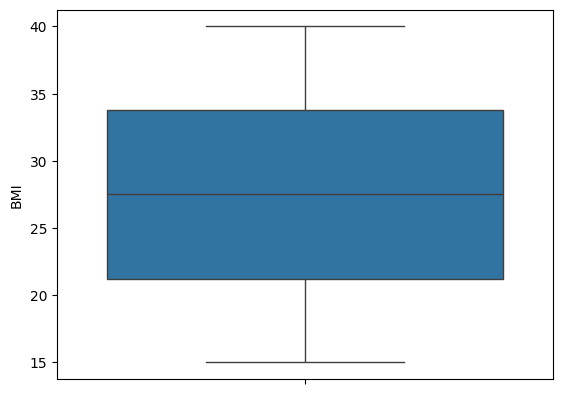

In [61]:
# plot a box plot for BMI column
sns.boxplot(df["BMI"])

- There are no outliers in BMI column which is confirmed by both boxplot and describe method

In [62]:
# getting the no of unique values in eac h column
for col in df.columns:
    print(f"no of unique values in {col} : {df[col].nunique()}")

no of unique values in State : 37
no of unique values in Age_Group : 2
no of unique values in Gender : 2
no of unique values in BMI : 251
no of unique values in Smoking_Status : 2
no of unique values in Alcohol_Consumption : 3
no of unique values in Exercise_Frequency : 4
no of unique values in Hypertension : 2
no of unique values in Diabetes : 2
no of unique values in Cholesterol_Level : 3
no of unique values in Family_History : 2
no of unique values in Stress_Level : 3
no of unique values in Diet_Type : 3
no of unique values in Heart_Attack_Severity : 3
no of unique values in Hospitalized : 2
no of unique values in Survived : 2
no of unique values in Income_Level : 3
no of unique values in Urban_Rural : 2
no of unique values in Employment_Status : 3


In [63]:
# making a list of numerical columns
num_cols = ["BMI"]

# classifying categorical columns in to Ordinal and Nominal columns without Diabetes

ord_cols = ["Age_Group","Alcohol_Consumption","Exercise_Frequency","Cholesterol_Level","Stress_Level","Heart_Attack_Severity","Income_Level"]

nom_cols = ["State","Gender","Smoking_Status","Hypertension","Family_History","Diet_Type","Hospitalized","Survived","Urban_Rural","Employment_Status"]

In [64]:
len(num_cols) + len(ord_cols) + len(nom_cols)

18

- There are only missing values in Alcohol_Consumption column

In [65]:
# getting the percentage of missing values in Alcohol_Consumption column

df["Alcohol_Consumption"].isnull().sum()/df.shape[0] * 100

25.09891009750822

- We have more than 8 lakh data points and even  after dropping the missing values we have more 6 lakh data points which are suffcient to train our model

In [66]:
# dropping all the missing values
df = df.dropna()
df.shape

(673208, 19)

In [67]:
# dividing the data into X,y

X = df.drop("Diabetes", axis = 1)
y = df["Diabetes"]

In [68]:
# encoding the y 
# yes = 1 and no = 0
y = y.map({"Yes":1,"No":0})
y

0         1
1         1
2         1
3         0
4         1
         ..
898790    0
898791    1
898793    0
898794    1
898795    0
Name: Diabetes, Length: 673208, dtype: int64

In [69]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(538566, 18)
(134642, 18)
(538566,)
(134642,)


In [70]:
X_train

,State,Age_Group,Gender,BMI,Smoking_Status,Alcohol_Consumption,Exercise_Frequency,Hypertension,Cholesterol_Level,Family_History,Stress_Level,Diet_Type,Heart_Attack_Severity,Hospitalized,Survived,Income_Level,Urban_Rural,Employment_Status
302761,Borno,Youth,Male,15.7,Smoker,High,Occasionally,No,Normal,No,Low,Mixed,Mild,Yes,Yes,Medium,Rural,Unemployed
832989,Cross River,Youth,Female,37.1,Smoker,Moderate,Daily,No,Normal,No,Moderate,Unhealthy,Severe,No,Yes,High,Urban,Unemployed
683471,Ondo,Adult,Male,15.9,Non-Smoker,Low,Rarely,No,Normal,No,Low,Mixed,Severe,No,Yes,Low,Urban,Unemployed
728545,Imo,Youth,Male,15.9,Smoker,High,Weekly,No,High,No,High,Healthy,Moderate,No,Yes,Medium,Urban,Employed
798563,Taraba,Youth,Male,17.8,Smoker,High,Weekly,Yes,Normal,Yes,Low,Mixed,Mild,No,No,Medium,Rural,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346014,Zamfara,Youth,Male,39.6,Smoker,Low,Occasionally,Yes,Borderline,Yes,High,Healthy,Moderate,Yes,No,Low,Rural,Student
488311,Kaduna,Youth,Female,37.3,Non-Smoker,High,Daily,Yes,High,No,Low,Mixed,Mild,Yes,Yes,High,Urban,Student
176037,Lagos,Adult,Male,26.5,Smoker,Low,Weekly,Yes,High,Yes,Low,Unhealthy,Moderate,Yes,Yes,High,Urban,Unemployed
896050,Kogi,Adult,Female,31.7,Smoker,High,Daily,Yes,Borderline,Yes,Moderate,Unhealthy,Severe,Yes,Yes,Low,Urban,Student


In [71]:
# label encoding the ordinal columns in X_train and X_test

from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

for col in ord_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


In [72]:
X_train


,State,Age_Group,Gender,BMI,Smoking_Status,Alcohol_Consumption,Exercise_Frequency,Hypertension,Cholesterol_Level,Family_History,Stress_Level,Diet_Type,Heart_Attack_Severity,Hospitalized,Survived,Income_Level,Urban_Rural,Employment_Status
302761,Borno,1,Male,15.7,Smoker,0,1,No,2,No,1,Mixed,0,Yes,Yes,2,Rural,Unemployed
832989,Cross River,1,Female,37.1,Smoker,2,0,No,2,No,2,Unhealthy,2,No,Yes,0,Urban,Unemployed
683471,Ondo,0,Male,15.9,Non-Smoker,1,2,No,2,No,1,Mixed,2,No,Yes,1,Urban,Unemployed
728545,Imo,1,Male,15.9,Smoker,0,3,No,1,No,0,Healthy,1,No,Yes,2,Urban,Employed
798563,Taraba,1,Male,17.8,Smoker,0,3,Yes,2,Yes,1,Mixed,0,No,No,2,Rural,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346014,Zamfara,1,Male,39.6,Smoker,1,1,Yes,0,Yes,0,Healthy,1,Yes,No,1,Rural,Student
488311,Kaduna,1,Female,37.3,Non-Smoker,0,0,Yes,1,No,1,Mixed,0,Yes,Yes,0,Urban,Student
176037,Lagos,0,Male,26.5,Smoker,1,3,Yes,1,Yes,1,Unhealthy,1,Yes,Yes,0,Urban,Unemployed
896050,Kogi,0,Female,31.7,Smoker,0,0,Yes,0,Yes,2,Unhealthy,2,Yes,Yes,1,Urban,Student


### One Hot encoding

In [73]:
# nom_cols

In [74]:
# # one hot encoding the nominal columns

# from sklearn.preprocessing import OneHotEncoder

# # initialising the encoder
# ohe_state = OneHotEncoder()

# # fitting the encoder
# state_encoder = ohe_state.fit_transform(X_train[["State"]])
# state_encoder




- Here, we get a sparse matrix with 37 columns and 538566 rows
- 37 columns are the unique states in Nigeria
- 538566 rows are the data points in X_train

In [75]:
# # converting sparse matrix to an array
# state_encoder = state_encoder.toarray()
# state_encoder

- we have converted the sparse matrix in to an array because we want to build a dataframe from this encoded data

In [76]:
# # getting the feature names
# ohe_state.get_feature_names_out(["State"])

In [77]:
# # building a encoded dataframe
# state_encoder_df = pd.DataFrame(state_encoder, columns=ohe_state.get_feature_names_out(["State"]))
# state_encoder_df

In [78]:
# # concatenating the state encoded dataframe with X_train while dropping the state column
# X_train = pd.concat([X_train.drop("State", axis = 1), state_encoder_df], axis = 0)
# X_train


In [79]:
X_train = pd.get_dummies(X_train, columns=nom_cols, drop_first=True, dtype=int)
X_train.shape

(538566, 55)

In [80]:
X_test = pd.get_dummies(X_test, columns=nom_cols, drop_first=True, dtype=int)
X_test.shape

(134642, 55)

In [81]:
pd.set_option('display.max_columns', None)
X_train

,Age_Group,BMI,Alcohol_Consumption,Exercise_Frequency,Cholesterol_Level,Stress_Level,Heart_Attack_Severity,Income_Level,State_Adamawa,State_Akwa Ibom,State_Anambra,State_Bauchi,State_Bayelsa,State_Benue,State_Borno,State_Cross River,State_Delta,State_Ebonyi,State_Edo,State_Ekiti,State_Enugu,State_FCT,State_Gombe,State_Imo,State_Jigawa,State_Kaduna,State_Kano,State_Katsina,State_Kebbi,State_Kogi,State_Kwara,State_Lagos,State_Nasarawa,State_Niger,State_Ogun,State_Ondo,State_Osun,State_Oyo,State_Plateau,State_Rivers,State_Sokoto,State_Taraba,State_Yobe,State_Zamfara,Gender_Male,Smoking_Status_Smoker,Hypertension_Yes,Family_History_Yes,Diet_Type_Mixed,Diet_Type_Unhealthy,Hospitalized_Yes,Survived_Yes,Urban_Rural_Urban,Employment_Status_Student,Employment_Status_Unemployed
302761,1,15.7,0,1,2,1,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1
832989,1,37.1,2,0,2,2,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1
683471,0,15.9,1,2,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1
728545,1,15.9,0,3,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0
798563,1,17.8,0,3,2,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346014,1,39.6,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0,0,1,0
488311,1,37.3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1,0
176037,0,26.5,1,3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,0,1
896050,0,31.7,0,0,0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,1,0


## Building the neural network model

In [96]:
# load sequential api and create an object
from keras.models import Sequential

# load dense (fully connected) layer 
from keras.layers import Dense

model = Sequential()

In [98]:
model.add(Dense(256, input_dim = X_train.shape[1], activation='relu', kernel_initializer='normal'))   #kernel_Initializers define the way to set the initial random weights of Keras layers
model.add(Dense(64, activation='relu', kernel_initializer='normal'))
model.add(Dense(32, activation='relu', kernel_initializer='normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))  # output layer

In [99]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 256)               14336     
                                                                 
 dense_35 (Dense)            (None, 64)                16448     
                                                                 
 dense_36 (Dense)            (None, 32)                2080      
                                                                 
 dense_37 (Dense)            (None, 1)                 33        
                                                                 
Total params: 32897 (128.50 KB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [101]:
model.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

In [102]:
model_history = model.fit(X_train, y_train, batch_size = 100, epochs = 15, 
                          validation_split = 0.2)

2025-02-09 19:53:37.357355: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 189574880 exceeds 10% of free system memory.


Epoch 1/15
4309/4309 [==============================] - 140s 32ms/step - loss: 0.6932 - accuracy: 0.5012 - val_loss: 0.6932 - val_accuracy: 0.4965
Epoch 2/15
4309/4309 [==============================] - 141s 33ms/step - loss: 0.6931 - accuracy: 0.5017 - val_loss: 0.6931 - val_accuracy: 0.5047
Epoch 3/15
4309/4309 [==============================] - 115s 27ms/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.4959
Epoch 4/15
4309/4309 [==============================] - 111s 26ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy: 0.4999
Epoch 5/15
4309/4309 [==============================] - 110s 26ms/step - loss: 0.6931 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.5054
Epoch 6/15
4309/4309 [==============================] - 115s 27ms/step - loss: 0.6931 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.4968
Epoch 7/15
4309/4309 [==============================] - 124s 29ms/step - loss: 0.6931 - accuracy: 0.5011 - val_loss: 0

In [103]:
# predicting the values
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

4208/4208 [==============================] - 40s 9ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [False]])

In [104]:
# converting y_pred to int
y_pred = y_pred.astype(int)
y_pred

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [105]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5004753345909895

In [106]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[ 8335, 58873],
       [ 8384, 59050]])

In [107]:
# saving the model
model.save("./model3.h5")

/home/krishna/Desktop/interface/venv/lib/python3.10/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 1st model

- While using tanh as activation function in hidden layers we are getting 0 True positives and 0 False negatives

[    0, 67208],

[    0, 67434]

- the hidden layer structure was [256, 128, 64, 32, 1]

- the accuracy score was 0.5008392626372157

### 2nd model
- using relu as activation function

[ 2154, 65054],

[ 2100, 65334]

- the hidden layer structure was [256, 128, 64, 32, 1]

- the accuracy score was 0.501240326198363

### 3rd model

- used all relu activation functions even in the first layer 
- optimizer -----> sigma
#### Confusion matrix

     [ 8335, 58873],
     [ 8384, 59050]

- the hidden layer structure was [256, 64, 32, 1]

- the accuracy score was 0.5004753345909895

- saved as "model3.h5"

- no of epochs = 15


In [112]:
# converting the X_tes to csv for testing purposes without index
X_test.to_csv("./X_test.csv", index = False)

In [111]:
X_test.shape

(134642, 55)

In [113]:
# loading the model
from keras.models import load_model
model = load_model("./model3.h5")
model

In [114]:
# predicting the values
y_pred = model.predict(X_test)
y_pred

4208/4208 [==============================] - 41s 10ms/step


array([[0.498591  ],
       [0.5008272 ],
       [0.5028998 ],
       ...,
       [0.5021664 ],
       [0.50116193],
       [0.4993142 ]], dtype=float32)